<a href="https://colab.research.google.com/github/noemiezufferey/2024_Geoinformatique_I/blob/main/s2_ip_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 2 - Structure de contrôle

## Conditions if, else, elif

**1. Vérification de la parité**

In [ ]:
# Ecrivez votre code ici
nombre = 6 #Entrez un nombre entier

if nombre % 2 == 0 :
    print("Pair")
else:
    print("Impaire")

Pair


**2. Comparaison de deux nombres**

In [ ]:
nombre1 = 7.2 #Entrez un chiffre à virgule
nombre2 = 3.8 #Entrez un deuxième chiffre à virgule

if nombre1 > nombre2:
    print("Le premier nombre est plus grand.")
elif nombre2 > nombre1 :
    print("Le deuxième nombre est plus grand.")
else: #nombre1==nombre2
    print("Les deux nombres sont égaux")

Le premier nombre est plus grand.


**3. Catégorisation d'âges**

In [ ]:
age = 20 # Entrez un nombre entier
if age < 12:
    print("Enfant")
elif 12 <= age < 18:
    print("Adolescent")
elif 18 <= age < 65:
    print("Adulte")
else: #age>= 65
    print("Senior")


Adulte


In [ ]:
# Exercice révisions
Moyenne = 10
if Moyenne < 10:
    print("Recalé")
elif 10 <= Moyenne < 12:
    print ("Passable")
elif 12 <= Moyenne < 14:
    print ("Assez bien")
elif 14 <= Moyenne < 16:
    print ("Bien")
elif 16 <= Moyenne <= 20:
    print ("Très bien")

Passable


## Boucle for et while

**1. Ecrire une boucle `while` pour afficher les valeurs des classements d'une liste de lecture d'albums stockée dans la liste <code>PlayListRatings</code>. Si le score est inférieur à 6, on sort de la boucle. La liste <code>PlayListRatings</code> est donnée par : <code>PlayListRatings = [10, 9.5, 10, 8, 7.5, 5, 10, 10]</code>**

In [ ]:
# Ecrivez votre code ici
PlayListRating = [10, 9.5, 10, 8, 7.5, 5, 10, 10]

# Astuce : Utilisez l'indexation de la liste comme critère (longueur de votre liste)
indx = 0
while indx<len(PlayListRating):
  if PlayListRating[indx]<6:
    break
  else:
    print(PlayListRating[indx])
  indx +=1

10
9.5
10
8
7.5


**2. Répétez ce que vous venez de faire, cette fois en utilisant une boucle `for`**.

In [ ]:
for indx in range(len(PlayListRating)):
  if PlayListRating[indx]<6:
    break
  else:
    print(PlayListRating[indx])

10
9.5
10
8
7.5


**3. Ecrivez une boucle `for` qui imprime (affiche) la liste suivante : <code>carres=['rouge', 'jaune', 'vert', 'violet', 'bleu']</code>**

In [ ]:
carres = ['rouge', 'jaune', 'vert', 'violet', 'bleu'] # An empty list
for index ,carres in enumerate(['rouge', 'jaune', 'vert', 'violet', 'bleu']):
  carres.append(str) # Here you add (append) the elements one by one to the empty list

print(carres)

AttributeError: 'str' object has no attribute 'append'

<ipython-input-7-2606bec33abd>:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


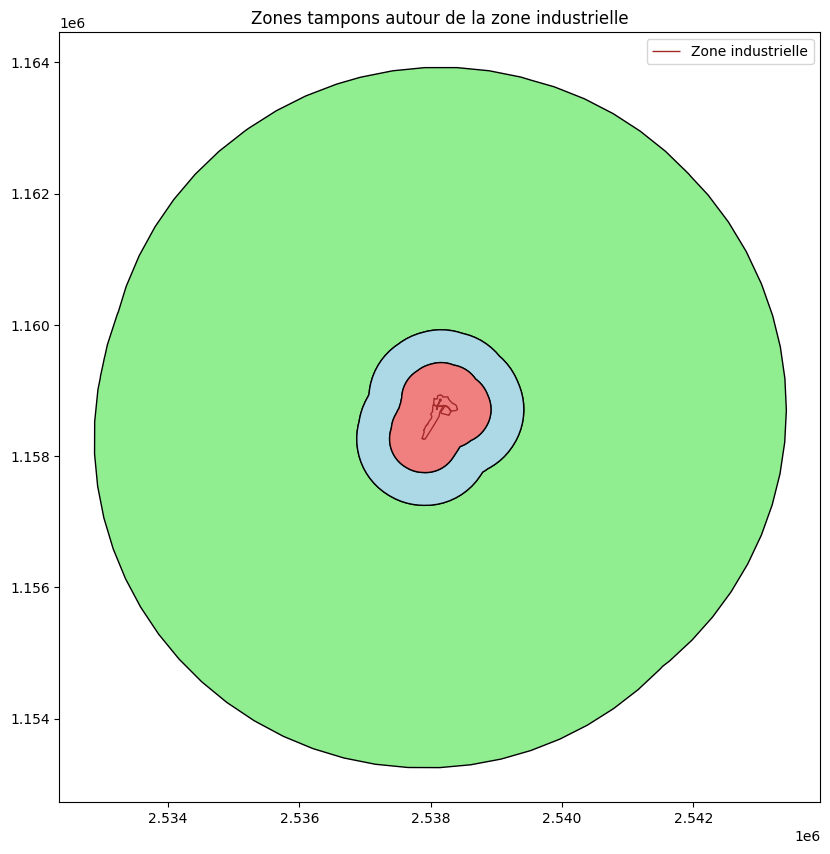

In [ ]:
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Charger le GeoPackage
path_to_geopackage = "/content/geoinf-proj-ze-9933.gpkg"  # Remplacez par le chemin de votre fichier
layer_name = "ze_9933"  # Remplacez par le nom de votre couche

gdf = gpd.read_file(path_to_geopackage, layer=layer_name)

# Fusionner tous les polygones en une seule géométrie
total_geometry = unary_union(gdf.geometry)

# Créer des zones tampons pour 500 m, 1 km, et 5 km
buffer_500m = total_geometry.buffer(500)
buffer_1km = total_geometry.buffer(1000)
buffer_5km = total_geometry.buffer(5000)

# Calculer les différences pour obtenir les anneaux
ring_1km = buffer_1km.difference(buffer_500m)
ring_5km = buffer_5km.difference(buffer_1km)

# Créer un GeoDataFrame pour chaque zone pour la visualisation
gdf_500m = gpd.GeoDataFrame(geometry=[buffer_500m], crs=gdf.crs)
gdf_1km_ring = gpd.GeoDataFrame(geometry=[ring_1km], crs=gdf.crs)
gdf_5km_ring = gpd.GeoDataFrame(geometry=[ring_5km], crs=gdf.crs)

# Visualiser les résultats
fig, ax = plt.subplots(figsize=(10, 10))
gdf_5km_ring.plot(ax=ax, color="lightgreen", edgecolor="black", label="5 km")
gdf_1km_ring.plot(ax=ax, color="lightblue", edgecolor="black", label="1 km")
gdf_500m.plot(ax=ax, color="lightcoral", edgecolor="black", label="500 m")

# Afficher la zone industrielle originale
gdf.boundary.plot(ax=ax, color="brown", linewidth=1, label="Zone industrielle")

plt.legend()
plt.title("Zones tampons autour de la zone industrielle")
plt.show()

# Sauvegarder les résultats dans un fichier GeoPackage
gdf_500m.to_file("buffer_500m.gpkg", driver="GPKG")
gdf_1km_ring.to_file("buffer_1km_ring.gpkg", driver="GPKG")
gdf_5km_ring.to_file("buffer_5km_ring.gpkg", driver="GPKG")

In [ ]:
# Recherche du nom de la couche dans le geopackage
!pip install fiona
import fiona
path_to_geopackage = "/content/geoinf-proj-ze-9933.gpkg"  # Remplacez par le chemin de votre fichier
print(fiona.listlayers(path_to_geopackage))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.2 MB/s eta 0:00:00
['ze_9933']


In [ ]:
import fiona

# Chemin vers votre fichier GeoPackage
path_to_geopackage = "/content/swissBOUNDARIES3D_1_5_LV95_LN02.gpkg"

# Obtenir et afficher la liste des couches
layers = fiona.listlayers(path_to_geopackage)
print("Couches disponibles dans le GeoPackage :")
for layer in layers:
    print(layer)


Couches disponibles dans le GeoPackage :
tlm_hoheitsgrenze
tlm_hoheitsgebiet
tlm_bezirksgebiet
tlm_landesgebiet
tlm_kantonsgebiet


In [ ]:
import geopandas as gpd

# Charger le geopackage et la couche spécifiée
gpkg_path = "/content/swissBOUNDARIES3D_1_5_LV95_LN02.gpkg"
layer_name = "tlm_hoheitsgebiet"

# Charger la couche dans un GeoDataFrame
gdf = gpd.read_file(gpkg_path, layer=layer_name)

# Afficher les colonnes du GeoDataFrame
print(gdf.columns)


Index(['uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr',
       'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr',
       'herkunft_monat', 'revision_jahr', 'revision_monat',
       'revision_qualitaet', 'objektart', 'bfs_nummer', 'bezirksnummer',
       'kantonsnummer', 'name', 'gem_flaeche', 'see_flaeche', 'icc', 'shn',
       'einwohnerzahl', 'hist_nr', 'geometry'],
      dtype='object')


Inspection de la zone tampon 500m:
Avant intersection:
                                            geometry
0  POLYGON ((2537392.533 1158432.649, 2537398.342...
Après intersection:
                                     uuid datum_aenderung datum_erstellung  \
0  {711AB9D3-BE76-4DF6-BB85-AF8BA3EE531C}      2023-11-08       2008-11-24   
1  {FA8F5DEB-65A9-45CF-9510-3BC84A782842}      2023-10-24       2008-11-24   
2  {C47941E0-223D-4A70-A15E-DD8489E301D4}      2023-10-24       2008-11-24   
3  {5E6836AB-0BCD-473E-8323-C69E1604F0E3}      2023-10-24       2008-11-24   

   erstellung_jahr  erstellung_monat grund_aenderung   herkunft  \
0             2006                 1      Verbessert  swisstopo   
1             2006                 1      Verbessert  swisstopo   
2             2006                 1      Verbessert  swisstopo   
3             2006                 1      Verbessert  swisstopo   

   herkunft_jahr  herkunft_monat  revision_jahr  ...  bezirksnummer  \
0           2024     

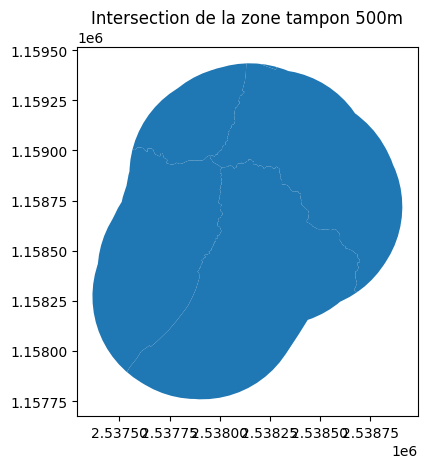

Population par commune pour la zone tampon 500m:
name
Cugy (VD)                 2696
Lausanne                141418
Le Mont-sur-Lausanne      9291
Morrens (VD)              1172
Name: einwohnerzahl, dtype: int32
Population par commune pour la zone tampon 1km:
name
Cugy (VD)                 2696
Lausanne                141418
Le Mont-sur-Lausanne      9291
Morrens (VD)              1172
Romanel-sur-Lausanne      3788
Name: einwohnerzahl, dtype: int32
Population par commune pour la zone tampon 5km:
name
Assens                     1672
Bottens                    1351
Boussens                   1006
Bretigny-sur-Morrens        877
Bussigny                  10365
Cheseaux-sur-Lausanne      4517
Crissier                   9181
Cugy (VD)                  2696
Epalinges                  9822
Etagnières                 1147
Froideville                2722
Jouxtens-Mézery            1468
Lausanne                 141418
Le Mont-sur-Lausanne       9291
Mex (VD)                    818
Morrens (VD) 

In [ ]:
# Créer un dictionnaire pour les zones tampons
zi_buf = {
    '500m': buffer_500m,
    '1km': ring_1km,
    '5km': ring_5km
}

# Convertir les géométries brutes en GeoDataFrames
zi_buf_gdf = {
    k: gpd.GeoDataFrame(geometry=[poly], crs=gdf.crs)
    for k, poly in zi_buf.items()
}

# Charger les données des communes (remplacer 'communes_file' par votre fichier réel)
communes_file = "/content/swissBOUNDARIES3D_1_5_LV95_LN02.gpkg"  # Remplacez par le chemin de votre fichier des communes
communes_layer_name = "tlm_hoheitsgebiet"  # Remplacez par le nom exact de la couche souhaitée
communes_gdf = gpd.read_file(communes_file, layer=communes_layer_name)


# Calculer l'intersection entre les zones tampons et les communes
zi_buf_cmnes = {
    k: gpd.overlay(gdf, communes_gdf, how='intersection')
    for k, gdf in zi_buf_gdf.items()
}

# Fonction pour inspecter et visualiser les résultats
def inspect_result(buffer_name):
    print(f"Inspection de la zone tampon {buffer_name}:")
    print("Avant intersection:")
    print(zi_buf_gdf[buffer_name])
    print("Après intersection:")
    print(zi_buf_cmnes[buffer_name])
    print("Affichage graphique:")
    zi_buf_cmnes[buffer_name].plot()
    plt.title(f"Intersection de la zone tampon {buffer_name}")
    plt.show()

# Exemple: inspection de la zone tampon de 500m
inspect_result('500m')

# Compter le nombre de personnes par commune pour chaque zone tampon (suppose une colonne 'population')
population_counts = {
    k: gdf.groupby('name')['einwohnerzahl'].sum()
    for k, gdf in zi_buf_cmnes.items()
}

# Afficher les résultats
for buffer_name, counts in population_counts.items():
    print(f"Population par commune pour la zone tampon {buffer_name}:")
    print(counts)

# Sauvegarder les résultats
for buffer_name, gdf in zi_buf_cmnes.items():
    output_file = f"buffer_{buffer_name}_intersect.gpkg"
    gdf.to_file(output_file, driver="GPKG")


In [ ]:
import geopandas as gpd
import fiona

# Chemin vers votre GeoPackage
path_to_geopackage = "/content/ofs_geostat.gpkg"  # Remplacez par le chemin de votre fichier

# Lister les couches disponibles dans le GeoPackage
layers = fiona.listlayers(path_to_geopackage)

# Afficher les noms des couches
print("Couches disponibles dans le GeoPackage :")
for layer in layers:
    print(layer)


Couches disponibles dans le GeoPackage :
ofs_geostat
pop_2023
empl_2022


In [ ]:
import geopandas as gpd
import fiona

# Chemin vers votre GeoPackage
path_to_geopackage = "/content/ofs_geostat.gpkg"  # Remplacez par le chemin de votre fichier

# Lister les couches disponibles dans le GeoPackage
layers = fiona.listlayers(path_to_geopackage)

# Afficher les noms des couches
print("Couches disponibles dans le GeoPackage :")
for layer in layers:
    print(layer)

    # Charger la couche pour lire ses colonnes
    gdf = gpd.read_file(path_to_geopackage, layer=layer)
    print(f"Colonnes dans la couche {layer} :")
    print(gdf.columns.tolist())


Couches disponibles dans le GeoPackage :
ofs_geostat
Colonnes dans la couche ofs_geostat :
['geometry']
pop_2023
Colonnes dans la couche pop_2023 :
['E_KOORD', 'N_KOORD', 'BBTOT', 'geometry']
empl_2022
Colonnes dans la couche empl_2022 :
['E_KOORD', 'N_KOORD', 'B08EMPT', 'geometry']


In [ ]:
import geopandas as gpd
import fiona
import pandas as pd

# Chemin vers votre GeoPackage
path_to_geopackage = "/content/ofs_geostat.gpkg"  # Remplacez par le chemin de votre fichier

# Charger les couches de population et d'emplois
layer_population = "pop_2023"  # Remplacez par le nom de la couche population
layer_emplois = "empl_2022"  # Remplacez par le nom de la couche emplois

population_gdf = gpd.read_file(path_to_geopackage, layer=layer_population)
emplois_gdf = gpd.read_file(path_to_geopackage, layer=layer_emplois)

# Ajouter la somme des populations et des emplois à chaque zone tampon
for buffer_name, buffer_gdf in zi_buf_gdf.items():
    buffer_gdf = buffer_gdf.copy()  # Éviter les modifications inattendues sur l'original

    # Assurez-vous que les noms des colonnes sont corrects ('Pop2023' et 'Empl2022' sont des exemples)
    sjoin_summarize(buffer_gdf, population_gdf, 'BBTOT', '')  # Nom réel à remplacer
    sjoin_summarize(buffer_gdf, emplois_gdf, 'B08EMPT', 'empl_2022_sum')  # Nom réel à remplacer

    # Ajouter la colonne 'peri' indiquant la zone tampon
    buffer_gdf['peri'] = buffer_name


# Fonction pour faire une jointure spatiale et résumer les données
def sjoin_summarize(poly_lyr, pts_lyr, pts_colname, poly_newcolname):
    """
    Associe les points aux polygones via une jointure spatiale et calcule la somme d'une colonne.
    """
    sjoin = pts_lyr.sjoin(poly_lyr, how='inner', predicate='within')
    somme_par_poly = sjoin.groupby(sjoin.index_right)[BBTOT].sum()
    poly_lyr[poly_newcolname] = poly_lyr.index.map(somme_par_poly).fillna(0)

# Calcul des habitants et emplois pour chaque zone tampon
zi_buf_collections = {}
for buffer_name, buffer_gdf in zi_buf_gdf.items():
    buffer_gdf = buffer_gdf.copy()  # Evite les modifications inattendues
    sjoin_summarize(buffer_gdf, population_gdf, 'population', 'pop_2023_sum')
    sjoin_summarize(buffer_gdf, emplois_gdf, 'emplois', 'empl_2022_sum')
    buffer_gdf['peri'] = buffer_name  # Ajoute la colonne "peri"
    zi_buf_collections[buffer_name] = buffer_gdf

# Extraction des colonnes nécessaires
data_500m = zi_buf_collections['500m'][['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]
data_1km = zi_buf_collections['1km'][['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]
data_5km = zi_buf_collections['5km'][['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]

# Combiner toutes les données dans un seul DataFrame Pandas
combined_data = pd.concat([data_500m, data_1km, data_5km], ignore_index=True)

# Remplacer les valeurs NaN par 0
combined_data = combined_data.fillna(0)

# Afficher le tableau final
print(combined_data)

# Sauvegarder le résultat final
combined_data.to_csv("result_combined_data.csv", index=False)


NameError: name 'BBTOT' is not defined